## If error downloading weights due to firewall:
Find the .deepface dicretory (https://stackoverflow.com/questions/76620093/keyerror-when-initializing-resnet-using-dlib-in-python)

Search for the weights trying to download in the error message on google/git

Download them and save them in the .deepface/weights folder



In [1]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# from google.colab.patches import cv2_imshow

2024-06-02 00:09:56.042018: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 00:09:56.083791: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 00:09:56.084779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 00:09:56.731546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# TO DO, match with directory of images

In [3]:
list_patients = ['19']
patient = 'sample'

In [4]:
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/'
image_path_1 = PATH+patient+"_1.png"
image_path_2 =  PATH+patient+"_2.png"
image_path_A =  PATH+patient+"_A.png"
image_path_phant = PATH+"phant.png"
image_path_phantcrop = PATH+ "phantcrop.png"

In [5]:
faces = DeepFace.extract_faces(image_path_1)#,model='Facenet')#,enforce_detection=False)

In [6]:
# CT1-CT2
DeepFace.verify(img1_path = image_path_1, img2_path = image_path_2, enforce_detection=False,threshold=0.4,model_name='Facenet512')

{'verified': True,
 'distance': 0.23775154862308878,
 'threshold': 0.4,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 146,
   'y': 55,
   'w': 184,
   'h': 184,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 150,
   'y': 42,
   'w': 175,
   'h': 175,
   'left_eye': None,
   'right_eye': None}},
 'time': 2.86}

In [7]:
# CTA-CT2
DeepFace.verify(img1_path = image_path_A, img2_path = image_path_2, enforce_detection=False,threshold=0.4,model_name='Facenet512')

{'verified': False,
 'distance': 0.7343561675462471,
 'threshold': 0.4,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 151,
   'y': 39,
   'w': 185,
   'h': 185,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 150,
   'y': 42,
   'w': 175,
   'h': 175,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.47}

In [8]:
# TO DO: DOWNLOAD WEIGHTS
# DeepFace.analyze(img_path = image_path_1, actions = ['age', 'gender', 'race', 'emotion']) 

In [15]:
# CTA-CT1
DeepFace.verify(img1_path = image_path_1, img2_path = image_path_2, enforce_detection=False,threshold=0.4)

{'verified': True,
 'distance': 0.37299415782705536,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 146,
   'y': 55,
   'w': 184,
   'h': 184,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 150,
   'y': 42,
   'w': 175,
   'h': 175,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.59}

In [10]:
faces = DeepFace.extract_faces(image_path_2)#,enforce_detection=False)
# print(faces)

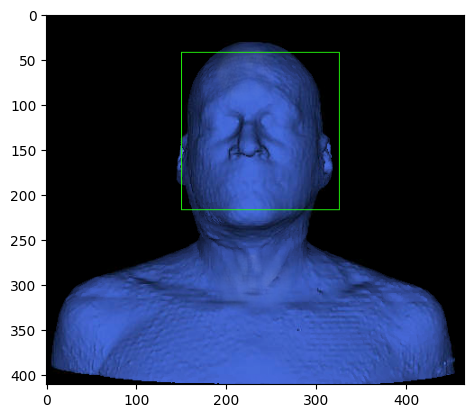

In [11]:
image = cv2.imread(image_path_2)  
x = faces[0]['facial_area']['x']
y = faces[0]['facial_area']['y']
w = faces[0]['facial_area']['w']
h = faces[0]['facial_area']['h']
image = cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
plt.imshow(image)

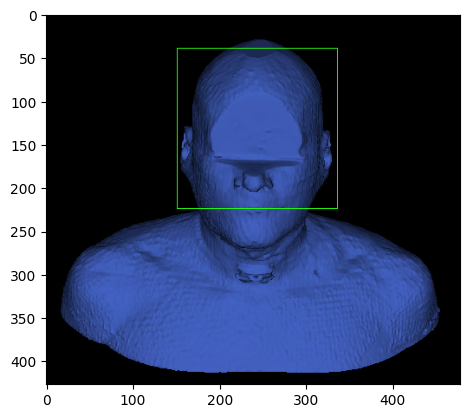

In [12]:
faces = DeepFace.extract_faces(image_path_A)#,enforce_detection=False)
image = cv2.imread(image_path_A)  
x = faces[0]['facial_area']['x']
y = faces[0]['facial_area']['y']
w = faces[0]['facial_area']['w']
h = faces[0]['facial_area']['h']
image = cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
plt.imshow(image)

In [19]:
list_patients = ['19','54','59','70','81','118','272','274','384','437','447','448']

In [14]:
DeepFace.detect_faces(img_path_1)

AttributeError: module 'deepface.DeepFace' has no attribute 'detect_faces'

In [ ]:
faces

In [ ]:
# path_data = "/data/kayla/screenshots/"
# dfs = DeepFace.find(img_path = patient+"_1.png", db_path = path_data)

In [16]:
num = ["1","2","A"]
for p in list_patients:
    for n in num:
        try:
            faces = DeepFace.extract_faces(PATH+p+"_"+n+".png")
            print(p, n, faces[0]['confidence'])
        except Exception as e:
            print("NO FACE", p,  n)


19 1 0.97
19 2 0.97
19 A 0.98
54 1 0.96
54 2 0.93
54 A 0.93
59 1 0.97
NO FACE 59 2
59 A 0.97
70 1 0.96
70 2 0.96
70 A 0.97
81 1 0.98
81 2 0.98
81 A 0.96
NO FACE 118 1
NO FACE 118 2
NO FACE 118 A
272 1 0.99
272 2 0.99
272 A 0.94
NO FACE 274 1
NO FACE 274 2
NO FACE 274 A
NO FACE 384 1
384 2 0.97
NO FACE 384 A
437 1 0.96
437 2 0.96
NO FACE 437 A
447 1 0.95
NO FACE 447 2
447 A 0.97
448 1 0.97
448 2 0.97
448 A 0.97


In [17]:
num = ["1","2","A"]
for p in list_patients:
    for n in num:
        try:
            faces = DeepFace.represent(PATH+p+"_"+n+".png")
            print(p, n, faces[0]['confidence'])
        except Exception as e:
            print("NO FACE", p,  n)


NO FACE 19 1
NO FACE 19 2
NO FACE 19 A
NO FACE 54 1
NO FACE 54 2
NO FACE 54 A
NO FACE 59 1
NO FACE 59 2
NO FACE 59 A
NO FACE 70 1
NO FACE 70 2
NO FACE 70 A
NO FACE 81 1
NO FACE 81 2
NO FACE 81 A
NO FACE 118 1
NO FACE 118 2
NO FACE 118 A
NO FACE 272 1
NO FACE 272 2
NO FACE 272 A
NO FACE 274 1
NO FACE 274 2
NO FACE 274 A
NO FACE 384 1
NO FACE 384 2
NO FACE 384 A
NO FACE 437 1
NO FACE 437 2
NO FACE 437 A
NO FACE 447 1
NO FACE 447 2
NO FACE 447 A
NO FACE 448 1
NO FACE 448 2
NO FACE 448 A


In [22]:
results_1_2 = []
results_A_2 = []

for p in list_patients:
    
    print(p)
    if p not in skip:
        result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=False,threshold=0.4)
        results_1_2.append(result['distance'])
        print("1 vs 2",result['distance'])

        result = DeepFace.verify(img1_path = PATH+p+"_A.png", img2_path = PATH+p+"_2.png", enforce_detection=False,threshold=0.4)
        results_A_2.append(result['distance'])
        print("A vs 2",result['distance'])

19
1 vs 2 0.33751287778598194
A vs 2 0.6985929364990877
54
1 vs 2 0.31930519248650346
A vs 2 0.6446925685415182
59
70
1 vs 2 0.4923657094122744
A vs 2 0.7381024442335626
81
1 vs 2 0.2502863405661846
A vs 2 0.5407558853312147
118
272
1 vs 2 0.2498792270382435
A vs 2 0.543834079026456
274
384
437
1 vs 2 0.2741522138184237
A vs 2 0.7684445117547534
447
448
1 vs 2 0.2127920073760261
A vs 2 0.6574005877947428


In [23]:
dict_emb = {}
colours = ['red','blue','magenta','cyan','orange','lime','yellow','green','purple','salmon','cadetblue','olive']

for i, p in enumerate(list_patients):
    dict_emb[p] = {}
    for n in num:
        dict_emb[p][n] = {}
        dict_emb[p][n]['colour'] = colours[i]
#         dict_emb[p][n]['n'] = n
        
      
        #embeddings
        embedding_objs = DeepFace.represent(img_path = PATH+p+"_"+n+".png", enforce_detection=False) 
#                 detector_backend = 'dlib'
#         )
        print(p,n,embedding_objs[0]['face_confidence'])
        dict_emb[p][n]['embedding'] = embedding_objs[0]['embedding']

19 1 0.97
19 2 0.97
19 A 0.98
54 1 0.96
54 2 0.93
54 A 0.93
59 1 0.97
59 2 0
59 A 0.97
70 1 0.96
70 2 0.96
70 A 0.97
81 1 0.98
81 2 0.98
81 A 0.96
118 1 0
118 2 0
118 A 0
272 1 0.99
272 2 0.99
272 A 0.94
274 1 0
274 2 0
274 A 0
384 1 0
384 2 0.97
384 A 0
437 1 0.96
437 2 0.96
437 A 0
447 1 0.95
447 2 0
447 A 0.97
448 1 0.97
448 2 0.97
448 A 0.97


In [20]:
skip = ['118','274','384','59','447']

In [ ]:
# DeepFace.extract_faces(image_path_1)

In [ ]:
# dict_emb

In [28]:


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [29]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["1","2"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(n)

In [30]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


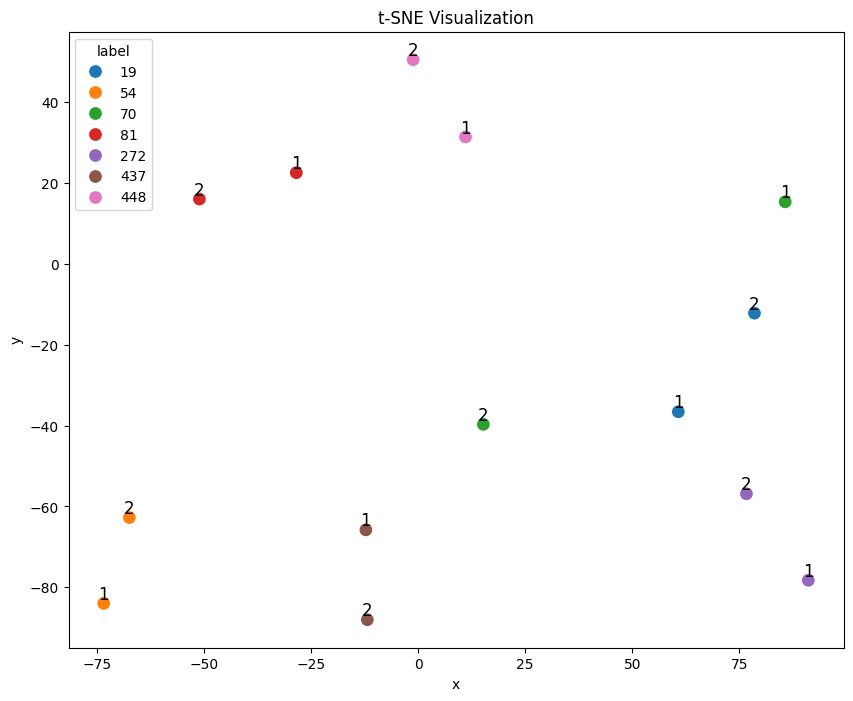

In [31]:

# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette="tab10", data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [32]:
len(X)

14

In [33]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["A","2"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(n)

In [34]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


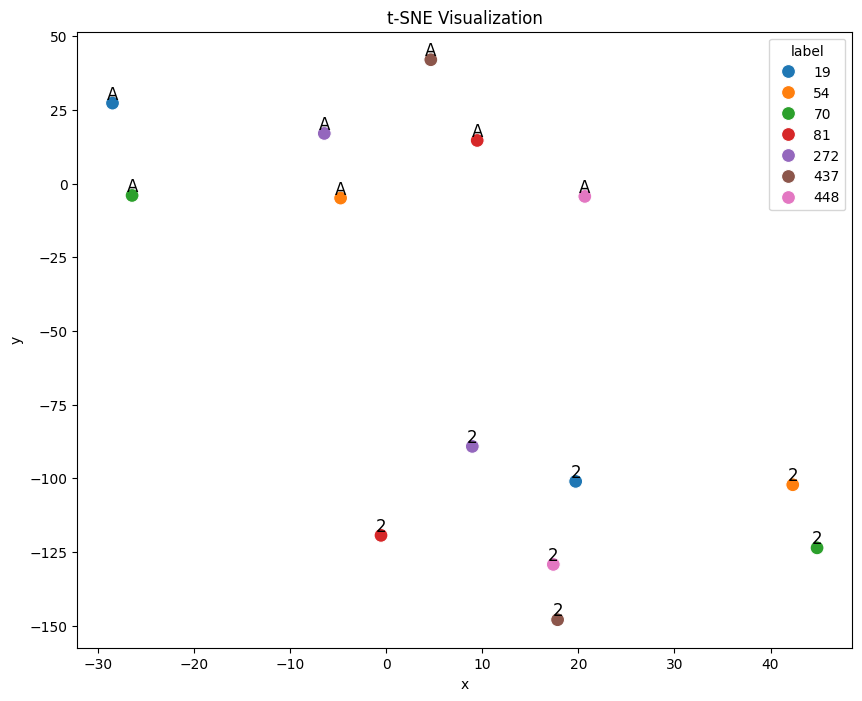

In [35]:

# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette="tab10", data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [36]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["A","2","1"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(n)

In [37]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


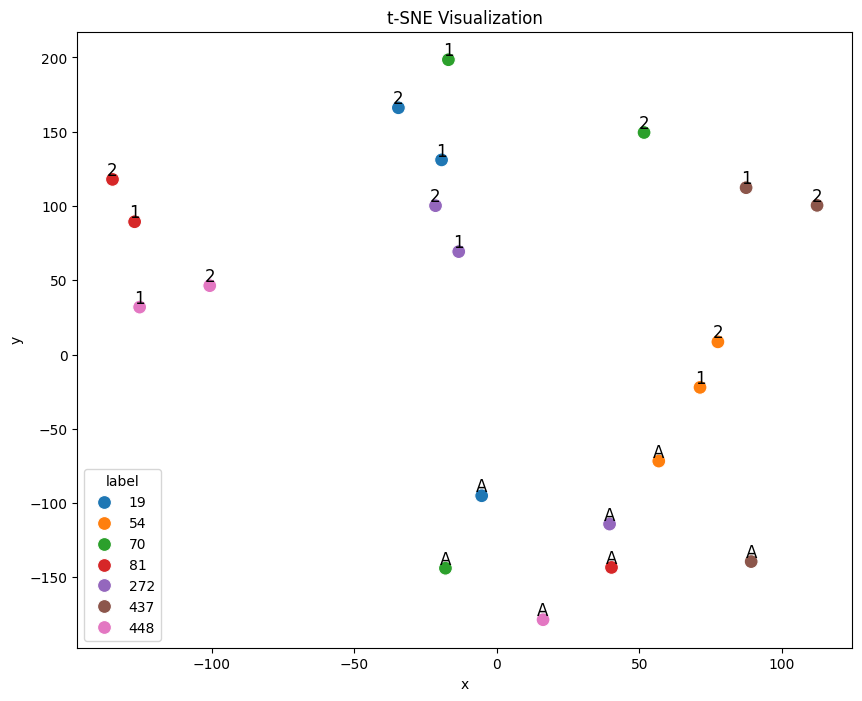

In [38]:

# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette="tab10", data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [39]:
distances = []
list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:
    list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p not in skip and p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_2.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        print(p1,"vs",p2,result['distance'])
        distances.append(result['distance'])

19 vs 54 0.47446463209440604
19 vs 70 0.5511579832270747
19 vs 81 0.4994576312309925
19 vs 272 0.39422255955917984
19 vs 437 0.49373151542840266
19 vs 448 0.4966225680300065
54 vs 70 0.4992157493755953
54 vs 81 0.557484989011276
54 vs 272 0.532869852953495
54 vs 437 0.5499990431467625
54 vs 448 0.6017813978297268
70 vs 81 0.7507811944034319
70 vs 272 0.607881218149655
70 vs 437 0.5806626073871721
70 vs 448 0.5005227857601451
81 vs 272 0.5050856360177993
81 vs 437 0.5471275701580688
81 vs 448 0.46920605743071375
272 vs 437 0.6298349082712371
272 vs 448 0.5861835847996679
437 vs 448 0.4817380590142524


In [40]:
np.mean(distances)

0.5385729306323362

In [41]:
np.mean(results_1_2)

0.3051847954976625

In [42]:
np.mean(results_A_2)

0.6559747161687622

In [43]:
len(results_A_2)

7

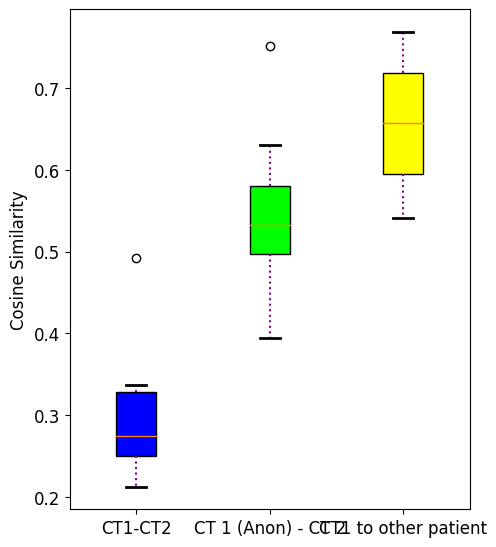

In [55]:
data = [results_1_2, distances,results_A_2]
plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(4,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # Changing color and line width of medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)

# # Changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#                color ='#e7298a',
#                alpha = 0.5)
    
# # x-axis labels
ax.set_xticklabels(['CT1-CT2', 'CT 1 (Anon) - CT 2', 'CT1 to other patient'])
plt.ylabel("Cosine Similarity")
# # Adding title
# plt.title("Vertical Box plot")

# # Removing top axes and right axes
# # ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show()

In [45]:
same_image =[]


list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:

    result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p1+'_1.png', enforce_detection=False,threshold=0.4)
    print(p1,"1 vs 1",result['distance'])
    same_image.append(result['distance'])

19 1 vs 1 0.0
54 1 vs 1 -2.220446049250313e-16
70 1 vs 1 2.220446049250313e-16
81 1 vs 1 0.0
272 1 vs 1 1.1102230246251565e-16
437 1 vs 1 0.0
448 1 vs 1 2.220446049250313e-16


In [46]:
distances_2_1_other = []
list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:
#     list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p not in skip and p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        print(p1,"vs",p2,result['distance'])
        distances_2_1_other.append(result['distance'])

19 vs 54 0.48890561497980367
19 vs 70 0.43113179034248794
19 vs 81 0.4865805041696747
19 vs 272 0.22366109493647668
19 vs 437 0.575591546727991
19 vs 448 0.3890026200643073
54 vs 19 0.47793568246626295
54 vs 70 0.5512119347506736
54 vs 81 0.6012282186780455
54 vs 272 0.5076429122726083
54 vs 437 0.5071051727407361
54 vs 448 0.6499456293949728
70 vs 19 0.3979541570215408
70 vs 54 0.5434322671137787
70 vs 81 0.6720801011196291
70 vs 272 0.5785289691350262
70 vs 437 0.667000163149585
70 vs 448 0.6024961540742135
81 vs 19 0.5081618448777717
81 vs 54 0.5482713277071409
81 vs 70 0.639627157443414
81 vs 272 0.4464708928148188
81 vs 437 0.5355470297059288
81 vs 448 0.3157109242502083
272 vs 19 0.5007280165707072
272 vs 54 0.620529384117657
272 vs 70 0.7491128546113829
272 vs 81 0.5761308615390388
272 vs 437 0.6251243576243011
272 vs 448 0.7251506482131469
437 vs 19 0.5146091608016685
437 vs 54 0.4225201814759916
437 vs 70 0.4226979940655847
437 vs 81 0.4978827321225978
437 vs 272 0.60734912133

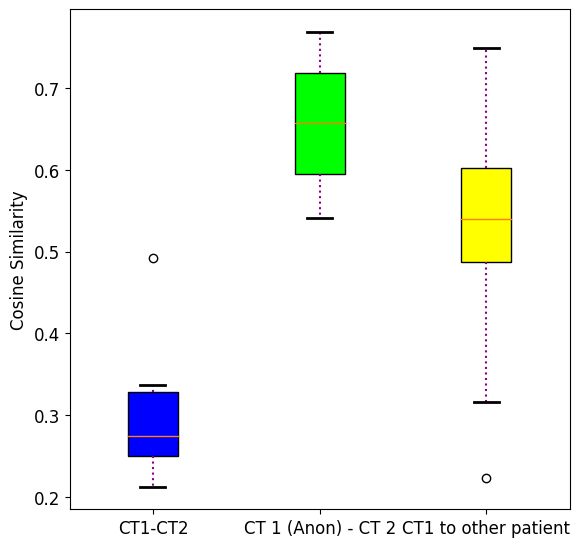

In [47]:
data = [results_1_2, results_A_2,distances_2_1_other]
plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(5,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # Changing color and line width of medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)

# # Changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#                color ='#e7298a',
#                alpha = 0.5)
    
# # x-axis labels
ax.set_xticklabels(['CT1-CT2', 'CT 1 (Anon) - CT 2', 'CT1 to other patient'])
plt.ylabel("Cosine Similarity")
# # Adding title
# plt.title("Vertical Box plot")

# # Removing top axes and right axes
# # ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show()

In [48]:
# CT1-CT2
DeepFace.verify(img1_path = image_path_2, img2_path = PATH+'ctp.png', enforce_detection=False,threshold=0.4,model_name='Facenet512')

{'verified': True,
 'distance': 0.2384420373993411,
 'threshold': 0.4,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 150,
   'y': 42,
   'w': 175,
   'h': 175,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 130,
   'y': 39,
   'w': 155,
   'h': 155,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.47}